# Импорт

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.gridspec as gridspec


# Загрузите датасет для регрессии, выделите целевой признак и предикторы.
<b>Целевой признак</b>: Appliances

- Tdewpoint - точка россы
- Windspeed - скорость ветра
- Press_mm_hg - давление мм/рт.ст.
- absolute_magnitude - абсолютная звёздная величина
- Appliances - прибор (применение)
- 

In [4]:
models = pd.read_csv('../../Data/neo_task.csv')
models

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,3561024.0,(2011 GZ2),0.016016,0.035813,56014.078517,1.024333e+06,26.10,False
1,54016766.0,(2020 HT6),0.030518,0.068240,7864.348060,3.268186e+07,24.70,False
2,3746620.0,(2016 ED156),0.055533,0.124177,55257.544508,6.538636e+07,23.40,False
3,3633054.0,(2013 FD8),0.019256,0.043057,41531.404722,1.260796e+07,25.70,False
4,3742124.0,(2016 CW31),0.139494,0.311918,67639.394481,7.130590e+07,21.40,False
...,...,...,...,...,...,...,...,...
90831,54231436.0,(2021 YE),0.017561,0.039268,23264.740825,1.635007e+06,25.90,False
90832,3824972.0,(2018 KL),0.110804,0.247765,24802.519406,3.351901e+07,21.90,False
90833,3740101.0,(2016 AB166),0.035039,0.078350,116288.999548,5.471396e+07,24.40,False
90834,3691093.0,(2014 SQ260),0.044112,0.098637,45763.317060,2.694877e+07,23.90,False


In [6]:
print(*(f'{i}: {len(models[i].unique())}' for i in  models.columns), sep='\n')

id: 27353
name: 27419
est_diameter_min: 1638
est_diameter_max: 1638
relative_velocity: 90272
miss_distance: 90536
absolute_magnitude: 1638
hazardous: 2


In [9]:
models['hazardous'].unique()

array([False,  True])

In [22]:
same_names = models['name'].value_counts()
same_names


277810 (2006 FV35)               43
469219 Kamo`oalewa (2016 HO3)    43
(2016 CA138)                     40
138175 (2000 EE104)              39
(2019 XS)                        38
                                 ..
(2004 FH29)                       1
(2002 EW11)                       1
(2015 CA1)                        1
(2010 DK)                         1
(2021 YE)                         1
Name: name, Length: 27418, dtype: int64

In [23]:
same_id = models['id'].value_counts()
same_id


2469219.0     43
2277810.0     43
3743123.0     39
3893865.0     38
2138175.0     38
              ..
3720894.0      1
2415267.0      1
3557878.0      1
3843802.0      1
54231436.0     1
Name: id, Length: 27352, dtype: int64

In [27]:
models.loc[models['id']==2469219]

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
338,2469219.0,469219 Kamo`oalewa (2016 HO3),0.036187,0.080917,11345.529263,2.427898e+07,24.33,False
2966,2469219.0,469219 Kamo`oalewa (2016 HO3),0.036187,0.080917,15045.754038,2.170340e+07,24.33,False
4461,2469219.0,469219 Kamo`oalewa (2016 HO3),0.036187,0.080917,15218.964906,2.079695e+07,24.33,False
6523,2469219.0,469219 Kamo`oalewa (2016 HO3),0.036187,0.080917,15445.788159,1.663276e+07,24.33,False
6599,2469219.0,469219 Kamo`oalewa (2016 HO3),0.036187,0.080917,14568.309190,2.333365e+07,24.33,False
7393,2469219.0,469219 Kamo`oalewa (2016 HO3),0.036187,0.080917,11116.485949,2.427107e+07,24.33,False
12602,2469219.0,469219 Kamo`oalewa (2016 HO3),0.036187,0.080917,15445.978808,1.880784e+07,24.33,False
14976,2469219.0,469219 Kamo`oalewa (2016 HO3),0.036187,0.080917,15304.364549,1.904591e+07,24.33,False
15572,2469219.0,469219 Kamo`oalewa (2016 HO3),0.036187,0.080917,15592.784770,2.262092e+07,24.33,False
15863,2469219.0,469219 Kamo`oalewa (2016 HO3),0.036187,0.080917,15439.983751,1.674039e+07,24.33,False


# Выявляем кореляцию

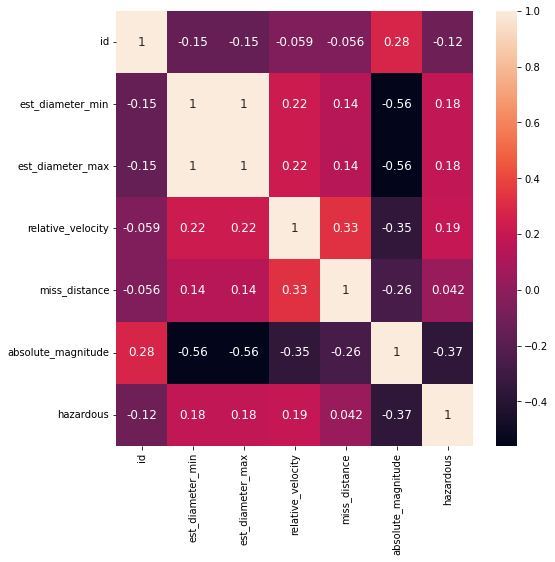

In [10]:
fig, ax = plt.subplots(figsize=(8,8))  
fig = sns.heatmap(models.corr(method='pearson'), annot=True, annot_kws={"fontsize":12}).get_figure()

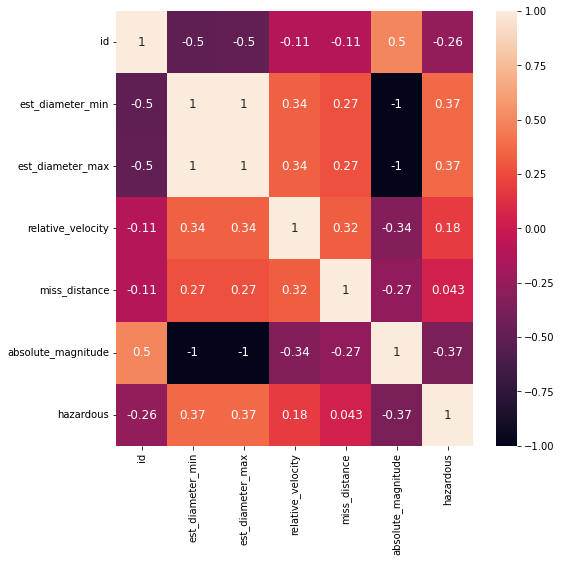

In [11]:
fig, ax = plt.subplots(figsize=(8,8))  
fig = sns.heatmap(models.corr(method='spearman'), annot=True, annot_kws={"fontsize":12}).get_figure()

# Проверим некоторые зависимости.

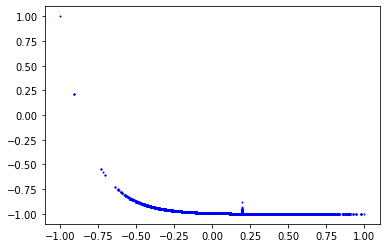

In [22]:
plt.plot(models['absolute_magnitude'], models['est_diameter_min'], 'bo', markersize=1)

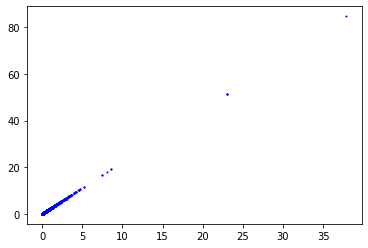

In [13]:
plt.plot(models['est_diameter_min'], models['est_diameter_max'], 'bo', markersize=1)